<a href="https://colab.research.google.com/github/Sahad66/cp/blob/main/datamining_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd  # Importing the pandas library for data manipulation
path='/content/drive/MyDrive/datamining/Data.csv'  # Defining the path to the CSV file
data=pd.read_csv(path)  # Reading the CSV file into a pandas DataFrame
data.head()  # Displaying the first 5 rows of the DataFrame


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [10]:
duped=data[data.duplicated()]
duped.value_counts() # Remove the print statement and directly call value_counts() on the DataFrame
sal_data=data.drop_duplicates()
sal_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [11]:
sal_data.shape

(325, 6)

In [12]:
sal_data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

PRINT TOTAL NUMBER OF ORGINAL DATA AND AFTER DISCARDING MISSING DATA

In [13]:
missing_values = sal_data.isnull()
missing_values_count = sal_data.isnull().sum()
print(missing_values_count)

Age                    1
Gender                 1
Education Level        1
Job Title              1
Years of Experience    1
Salary                 1
dtype: int64


PRINT TOTAL NUMBER OF ORGINAL DATA AND AFTER DISCARDING MISSING DATA

In [14]:
print('number of rows in orginal data=%d ' % (sal_data.shape[0]))
data2=sal_data.dropna()
print('number of rows after discarding missing data=%d ' % (data2.shape[0]))

number of rows in orginal data=325 
number of rows after discarding missing data=324 


rename column

In [21]:
sal_data.columns = ['Age', 'Gender', 'Degree', 'Job_Title','Experience_years', 'Salary']

Column data types

In [22]:
sal_data.dtypes

,0
Age,float64
Gender,object
Degree,object
Job_Title,object
Experience_years,float64
Salary,float64


INformation of dataset

In [23]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325 entries, 0 to 371
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               324 non-null    float64
 1   Gender            324 non-null    object 
 2   Degree            324 non-null    object 
 3   Job_Title         324 non-null    object 
 4   Experience_years  324 non-null    float64
 5   Salary            324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.8+ KB


Duplicate Records in Data

In [24]:
sal_data[sal_data.duplicated()]

,Age,Gender,Degree,Job_Title,Experience_years,Salary


Count the total no of duplicated data

In [25]:
sal_data[sal_data.duplicated()].shape

(0, 6)

Dropping Duplicates from DataSet

In [26]:
sal_data1=sal_data.drop_duplicates(keep='first')
sal_data1.shape

(325, 6)

Dropping Missing Value

In [27]:
sal_data1.dropna(how='any',inplace=True)
sal_data.shape

(325, 6)

In [28]:
sal_data1.shape

(324, 6)

In [29]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Data Exploration and Visualization

In [31]:
sal_data1.describe()

,Age,Experience_years,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


Correlation Matrix among Numerical Features

In [34]:
corr = sal_data1[['Age','Experience_years','Salary']].corr() # Add parentheses to call the corr() method
corr

,Age,Experience_years,Salary
Age,1.000000,0.979192,0.916543
Experience_years,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


<Axes: >

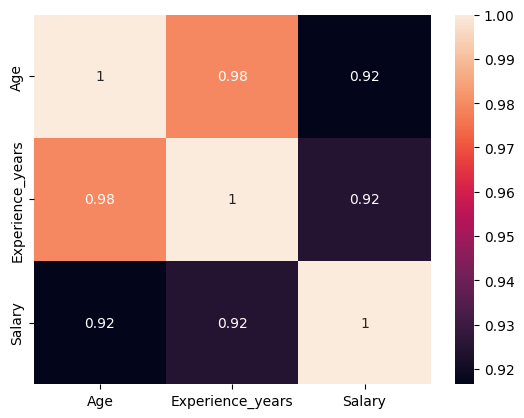

In [35]:
sns.heatmap(corr, annot=True)  # Generates a heatmap of the correlation matrix with annotations (numeric values)


Data Visualization-Bar Chart, Box plot, Histogram

In [37]:
sal_data1['Degree'].value_counts()  # Counts the occurrences of each unique value in the 'Degree' column


,count
Degree,
Bachelor's,191
Master's,91
PhD,42


<Axes: xlabel='Degree'>

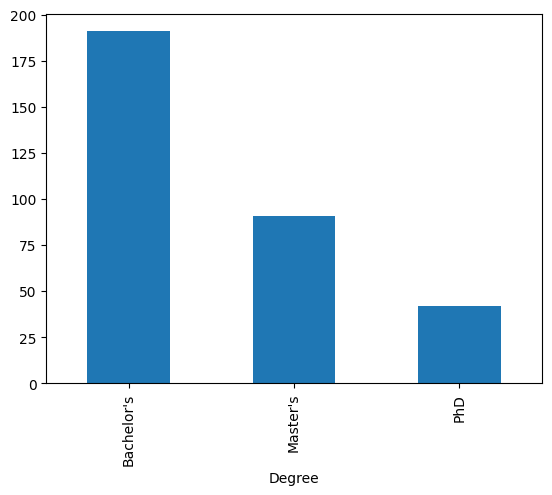

In [38]:
sal_data1['Degree'].value_counts().plot(kind='bar')  # 'Degree' কলামের মানগুলোর ঘটনার সংখ্যা বার চিত্রে প্রদর্শন করে


In [39]:
sal_data1['Job_Title'].value_counts()  # 'Job_Title' কলামে প্রতিটি চাকরির শিরোনামের ঘটনার সংখ্যা গননা করে


,count
Job_Title,
Director of Operations,9
Director of Marketing,8
Senior Marketing Manager,8
Senior Project Manager,7
Senior Business Analyst,6
...,...
Business Development Manager,1
Customer Service Representative,1
IT Manager,1


<Axes: ylabel='Frequency'>

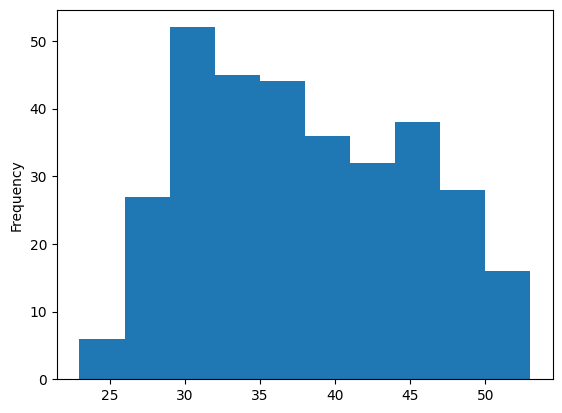

In [40]:
sal_data['Age'].plot(kind='hist')  # 'Age' কলামের মানগুলোর জন্য একটি হিস্টোগ্রাম প্রদর্শন করে

<Axes: >

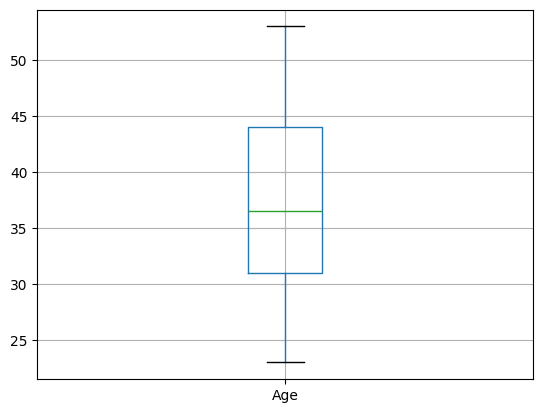

In [41]:
sal_data1.boxplot(column='Age')  # 'Age' কলামের জন্য একটি বক্সপ্লট তৈরি করে, যা আউটলাইয়ার এবং ডেটার বণ্টন দেখায়


Also do the box plot for every column(do by yourself)

In [43]:
sal_data1.head()  # 'sal_data1' ডেটাফ্রেমের প্রথম ৫টি সারি প্রদর্শন করে


,Age,Gender,Degree,Job_Title,Experience_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [44]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()
sal_data1['Gender_Encode'] = Label_Encoder.fit_transform(sal_data1['Gender'])
sal_data1['Degree_Encode'] = Label_Encoder.fit_transform(sal_data1['Degree'])
sal_data1['Job_Title_Encode'] = Label_Encoder.fit_transform(sal_data1['Job_Title'])

In [45]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


Feature Scalling

In [46]:
from sklearn.preprocessing import StandardScaler
std_scaler  = StandardScaler()

In [47]:
sal_data1['Age_Scale'] = std_scaler.fit_transform(sal_data1[['Age']])
sal_data1['Experience_years_Scale'] = std_scaler.fit_transform(sal_data1[['Experience_years']])


In [48]:
sal_data1.head()


,Age,Gender,Degree,Job_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_Scale,Experience_years_Scale
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


Dependent and Independent Features:

In [49]:
x=sal_data1[['Age_Scale','Experience_years_Scale','Gender_Encode','Degree_Encode','Job_Title_Encode']]
y=sal_data1['Salary']
print(x)

     Age_Scale  Experience_years_Scale  Gender_Encode  Degree_Encode  \
0    -0.750231               -0.761821              1              0   
1    -1.307742               -1.063017              0              1   
2     1.061680                0.744158              1              2   
3    -0.192720               -0.460625              0              0   
4     2.037324                1.497148              1              1   
..         ...                     ...            ...            ...   
348  -1.307742               -1.364212              0              0   
349  -0.192720               -0.310027              1              0   
350   0.922302                0.894756              0              2   
351  -0.889609               -1.063017              1              0   
371   0.782924                1.346550              1              1   

     Job_Title_Encode  
0                 159  
1                  17  
2                 130  
3                 101  
4              

In [50]:
x.head()

,Age_Scale,Experience_years_Scale,Gender_Encode,Degree_Encode,Job_Title_Encode
0,-0.750231,-0.761821,1,0,159
1,-1.307742,-1.063017,0,1,17
2,1.061680,0.744158,1,2,130
3,-0.192720,-0.460625,0,0,101
4,2.037324,1.497148,1,1,22


In [51]:
y.head()

,Salary
0,90000.0
1,65000.0
2,150000.0
3,60000.0
4,200000.0


Split the data into Training and Testing Set

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [53]:
x_train.shape, y_test.shape

((259, 5), (65,))

In [54]:
x_test.shape, y_test.shape

((65, 5), (65,))

Model Development

In [55]:
from sklearn.linear_model import LinearRegression
Linear_regression_model = LinearRegression()


Model Training

In [56]:
Linear_regression_model.fit(x_train, y_train)

LinearRegression()

Model prediction

In [57]:
y_pred_lr=Linear_regression_model.predict(x_test)
y_pred_lr

array([117415.91344602, 125562.80742758,  48965.15386167, 128739.34887988,
       106828.49930535,  99654.76748821,  49101.27883652,  57130.71108104,
       166333.69009266,  43112.61060113,  40544.18249367, 122553.217185  ,
       107631.15450848, 155580.48335296,  83652.23602446, 170890.28450907,
        98984.50106226, 109338.33008328,  42267.86835535,  48089.87647812,
        75674.93528581,  64499.29874156,  63619.2494321 ,  31543.41552147,
       188376.92844437,  90340.76921722, 155285.91529198, 160863.57809872,
       185183.73163709,  34741.26224478, 124850.6230462 , 165106.94121635,
        87085.00622186, 155425.69514031, 149190.25441885,  45729.74800187,
        88475.39474629,  92025.62668073,  97997.32557607,  40411.112659  ,
        89995.79796521,  53873.21977084, 108677.48549927,  54590.96778663,
        36497.92729223,  48611.85493217, 129193.72126941,  43102.58902589,
       162383.16672117,  81874.95829259, 157771.0301154 ,  43984.89040816,
        59950.21740617,  

In [58]:
df=pd.DataFrame({'y_Actual':y_test,'y_Predicted':y_pred_lr})
df

,y_Actual,y_Predicted
132,100000.0,117415.913446
108,100000.0,125562.807428
137,50000.0,48965.153862
9,110000.0,128739.348880
181,105000.0,106828.499305
...,...,...
104,80000.0,117279.788471
233,85000.0,83396.821876
60,170000.0,177743.761029
94,75000.0,72275.144274


Checking errors


In [59]:
df['Error']=df['y_Actual']-df['y_Predicted']
df

,y_Actual,y_Predicted,Error
132,100000.0,117415.913446,-17415.913446
108,100000.0,125562.807428,-25562.807428
137,50000.0,48965.153862,1034.846138
9,110000.0,128739.348880,-18739.348880
181,105000.0,106828.499305,-1828.499305
...,...,...,...
104,80000.0,117279.788471,-37279.788471
233,85000.0,83396.821876,1603.178124
60,170000.0,177743.761029,-7743.761029
94,75000.0,72275.144274,2724.855726


Absolute errors

In [60]:
df['Absolute Error']=abs(df['Error'])
df

,y_Actual,y_Predicted,Error,Absolute Error
132,100000.0,117415.913446,-17415.913446,17415.913446
108,100000.0,125562.807428,-25562.807428,25562.807428
137,50000.0,48965.153862,1034.846138,1034.846138
9,110000.0,128739.348880,-18739.348880,18739.348880
181,105000.0,106828.499305,-1828.499305,1828.499305
...,...,...,...,...
104,80000.0,117279.788471,-37279.788471,37279.788471
233,85000.0,83396.821876,1603.178124,1603.178124
60,170000.0,177743.761029,-7743.761029,7743.761029
94,75000.0,72275.144274,2724.855726,2724.855726


Finding Mean absolute errors

Double-click (or enter) to edit




In [61]:
Mean_absolute_error=df['Absolute Error'].mean()
Mean_absolute_error

10570.786401136185

Find the accuracy of model

In [63]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
r2_score(y_test,y_pred_lr)

0.8911231066517087

In [64]:
print(f'accuracy of the model is={round(r2_score(y_test, y_pred_lr),4)*100}%;)')

accuracy of the model is=89.11%;)
